<a href="https://colab.research.google.com/github/SonnieCodes/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module3-join-and-reshape-data/LS_DS12_113_Join_and_Reshape_Data_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 1, Sprint 1, Module 3*

---

# Join and Reshape datasets

Objectives
- concatenate data with pandas
- merge data with pandas
-  understand tidy data formatting
-  melt and pivot data with pandas

Links
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
- [Tidy Data](https://en.wikipedia.org/wiki/Tidy_data)
  - Combine Data Sets: Standard Joins
  - Tidy Data
  - Reshaping Data
- Python Data Science Handbook
  - [Chapter 3.6](https://jakevdp.github.io/PythonDataScienceHandbook/03.06-concat-and-append.html), Combining Datasets: Concat and Append
  - [Chapter 3.7](https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html), Combining Datasets: Merge and Join
  - [Chapter 3.8](https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html), Aggregation and Grouping
  - [Chapter 3.9](https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html), Pivot Tables
  
Reference
- Pandas Documentation: [Reshaping and Pivot Tables](https://pandas.pydata.org/pandas-docs/stable/reshaping.html)
- Modern Pandas, Part 5: [Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

In [2]:
!wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

--2020-01-15 22:56:15--  https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.9.134
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.9.134|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205548478 (196M) [application/x-gzip]
Saving to: ‘instacart_online_grocery_shopping_2017_05_01.tar.gz.3’

instacart_online_gr 100%[===================>] 196.03M  16.4MB/s    in 13s     

2020-01-15 22:56:29 (14.8 MB/s) - ‘instacart_online_grocery_shopping_2017_05_01.tar.gz.3’ saved [205548478/205548478]



In [3]:
!tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

instacart_2017_05_01/
instacart_2017_05_01/._aisles.csv
instacart_2017_05_01/aisles.csv
instacart_2017_05_01/._departments.csv
instacart_2017_05_01/departments.csv
instacart_2017_05_01/._order_products__prior.csv
instacart_2017_05_01/order_products__prior.csv
instacart_2017_05_01/._order_products__train.csv
instacart_2017_05_01/order_products__train.csv
instacart_2017_05_01/._orders.csv
instacart_2017_05_01/orders.csv
instacart_2017_05_01/._products.csv
instacart_2017_05_01/products.csv


In [4]:
%cd instacart_2017_05_01

/content/instacart_2017_05_01


In [5]:
!ls -lh *.csv

-rw-r--r-- 1 502 staff 2.6K May  2  2017 aisles.csv
-rw-r--r-- 1 502 staff  270 May  2  2017 departments.csv
-rw-r--r-- 1 502 staff 551M May  2  2017 order_products__prior.csv
-rw-r--r-- 1 502 staff  24M May  2  2017 order_products__train.csv
-rw-r--r-- 1 502 staff 104M May  2  2017 orders.csv
-rw-r--r-- 1 502 staff 2.1M May  2  2017 products.csv


# # Assignment

## Join Data Practice

These are the top 10 most frequently ordered products. How many times was each ordered? 

1. Banana
2. Bag of Organic Bananas
3. Organic Strawberries
4. Organic Baby Spinach 
5. Organic Hass Avocado
6. Organic Avocado
7. Large Lemon 
8. Strawberries
9. Limes 
10. Organic Whole Milk

First, write down which columns you need and which dataframes have them.

Next, merge these into a single dataframe.

Then, use pandas functions from the previous lesson to get the counts of the top 10 most frequently ordered products.

In [6]:
# I will need product_name, product_id, and order_id

import pandas as pd

products = pd.read_csv('products.csv')
products.head()

product_id  ... department_id
0           1  ...            19
1           2  ...            13
2           3  ...             7
3           4  ...             1
4           5  ...            13

[5 rows x 4 columns]

In [7]:
order_products__prior = pd.read_csv('order_products__prior.csv')
order_products__prior.head()


order_id  product_id  add_to_cart_order  reordered
0         2       33120                  1          1
1         2       28985                  2          1
2         2        9327                  3          0
3         2       45918                  4          1
4         2       30035                  5          0

In [8]:
order_products__train = pd.read_csv('order_products__train.csv')
order_products__train.head()

order_id  product_id  add_to_cart_order  reordered
0         1       49302                  1          1
1         1       11109                  2          1
2         1       10246                  3          0
3         1       49683                  4          0
4         1       43633                  5          1

In [9]:
# Combining order_products_prior, and order_products_train

order_products = pd.concat([order_products__prior, order_products__train])
order_products.head()

order_id  product_id  add_to_cart_order  reordered
0         2       33120                  1          1
1         2       28985                  2          1
2         2        9327                  3          0
3         2       45918                  4          1
4         2       30035                  5          0

In [0]:
# A little cleanup of the origional data frames

products = products.drop(['aisle_id', 'department_id'], axis=1)
order_products = order_products.drop(['add_to_cart_order', 'reordered'], axis=1)

In [11]:
# Creating a data set with the top 10 plus their product ID

top_10 = (['Banana',
           'Bag of Organic Bananas',
           'Organic Strawberries',
           'Organic Baby Spinach',
           'Organic Hass Avocado',
           'Organic Avocado',
           'Large Lemon',
           'Strawberries',
           'Limes',
           'Organic Whole Milk'])

condition = products['product_name'].isin(top_10)
top_10_with_id = products[condition]
top_10_with_id

product_id            product_name
13175       13176  Bag of Organic Bananas
16796       16797            Strawberries
21136       21137    Organic Strawberries
21902       21903    Organic Baby Spinach
24851       24852                  Banana
26208       26209                   Limes
27844       27845      Organic Whole Milk
47208       47209    Organic Hass Avocado
47625       47626             Large Lemon
47765       47766         Organic Avocado

In [12]:
# Merging top_10_with_id and order_products into 1 data frame

id_name_order = pd.merge(top_10_with_id, order_products, on='product_id', how='inner')
print(id_name_order.shape)
id_name_order.head()

(2418314, 3)


product_id            product_name  order_id
0       13176  Bag of Organic Bananas         5
1       13176  Bag of Organic Bananas        27
2       13176  Bag of Organic Bananas        29
3       13176  Bag of Organic Bananas        32
4       13176  Bag of Organic Bananas        42

In [13]:
# Lets get the counts

id_name_order['product_name'].value_counts()

Banana                    491291
Bag of Organic Bananas    394930
Organic Strawberries      275577
Organic Baby Spinach      251705
Organic Hass Avocado      220877
Organic Avocado           184224
Large Lemon               160792
Strawberries              149445
Limes                     146660
Organic Whole Milk        142813
Name: product_name, dtype: int64

## Reshape Data Section

- Replicate the lesson code. Remember, if you haven't followed along typing out what we did during lecture, do that now to get more repetition with the syntax.
- Take table 2 (the transpose of table 1) and practice changing it into Tidy format and back again. You should not use the transpose operation anywhere in this code:
 - Table 2 --> Tidy
 - Tidy --> Table 2
- Load seaborn's `flights` dataset by running the cell below. Then create a pivot table showing the number of passengers by month and year. Use year for the index and month for the columns. You've done it right if you get 112 passengers for January 1949 and 432 passengers for December 1960.

In [14]:
import pandas as pd
import numpy as np

table1 = pd.DataFrame(
    [[np.nan, 2],
     [16,    11], 
     [3,      1]],
    index=['John Smith', 'Jane Doe', 'Mary Johnson'], 
    columns=['treatmenta', 'treatmentb'])

table2 = table1.T

table2

John Smith  Jane Doe  Mary Johnson
treatmenta         NaN      16.0           3.0
treatmentb         2.0      11.0           1.0

In [15]:
table2 = table2.reset_index()
table2

index  John Smith  Jane Doe  Mary Johnson
0  treatmenta         NaN      16.0           3.0
1  treatmentb         2.0      11.0           1.0

In [16]:
# table2 -> tidy

table2 = table2.melt(id_vars='index', value_vars=['John Smith', 'Jane Doe', 
                                                       'Mary Johnson'])
table2

index      variable  value
0  treatmenta    John Smith    NaN
1  treatmentb    John Smith    2.0
2  treatmenta      Jane Doe   16.0
3  treatmentb      Jane Doe   11.0
4  treatmenta  Mary Johnson    3.0
5  treatmentb  Mary Johnson    1.0

In [17]:
# Rename columns

table2 = table2.rename(columns={'index': 'trt',
                                'variable': 'name',
                                'value': 'result'})
table2

trt          name  result
0  treatmenta    John Smith     NaN
1  treatmentb    John Smith     2.0
2  treatmenta      Jane Doe    16.0
3  treatmentb      Jane Doe    11.0
4  treatmenta  Mary Johnson     3.0
5  treatmentb  Mary Johnson     1.0

In [18]:
# Changing treatmenta to just a, the same with b

table2.trt = table2.trt.str.replace('treatment', '')
table2

trt          name  result
0   a    John Smith     NaN
1   b    John Smith     2.0
2   a      Jane Doe    16.0
3   b      Jane Doe    11.0
4   a  Mary Johnson     3.0
5   b  Mary Johnson     1.0

In [19]:
# tidy -> table2
table2.pivot_table(index='trt', columns='name', values='result')

name  Jane Doe  John Smith  Mary Johnson
trt                                     
a         16.0         NaN           3.0
b         11.0         2.0           1.0

In [0]:
import seaborn as sns
flights = sns.load_dataset('flights')

In [21]:
# Flights Pivot Table

flights.pivot_table(index='year', columns='month')

passengers                       ...                                    
month    January February March April  ... September October November December
year                                   ...                                    
1949         112      118   132   129  ...       136     119      104      118
1950         115      126   141   135  ...       158     133      114      140
1951         145      150   178   163  ...       184     162      146      166
1952         171      180   193   181  ...       209     191      172      194
1953         196      196   236   235  ...       237     211      180      201
1954         204      188   235   227  ...       259     229      203      229
1955         242      233   267   269  ...       312     274      237      278
1956         284      277   317   313  ...       355     306      271      306
1957         315      301   356   348  ...       404     347      305      336
1958         340      318   362   348  ...       404     359      310      337
1959         360      342   406   396  ...       463     407      362      405
1960         417      391   419   461  ...       508     461      390      432

[12 rows x 12 columns]

In [22]:
from IPython.display import display, Image
url = 'https://cdn-images-1.medium.com/max/1600/1*wKfV6OV-_1Ipwrl7AjjSuw.png'
example = Image(url=url, width=600)
display(example)

In [0]:
products = pd.read_csv('products.csv')
order_products = pd.concat([pd.read_csv('order_products__prior.csv'), 
                            pd.read_csv('order_products__train.csv')])
orders = pd.read_csv('orders.csv')

In [0]:
product_names = ['Half Baked Frozen Yogurt', 'Half And Half Ultra Pasteurized']

In [25]:
products.columns.to_list()

['product_id', 'product_name', 'aisle_id', 'department_id']

In [26]:
orders.columns.to_list()

['order_id',
 'user_id',
 'eval_set',
 'order_number',
 'order_dow',
 'order_hour_of_day',
 'days_since_prior_order']

In [27]:
order_products.columns.to_list()

['order_id', 'product_id', 'add_to_cart_order', 'reordered']

In [0]:
merged = (products[['product_id', 'product_name']]
          .merge(order_products[['order_id', 'product_id']])
          .merge(orders[['order_id', 'order_hour_of_day']]))

In [29]:
merged.head()

product_id                product_name  order_id  order_hour_of_day
0           1  Chocolate Sandwich Cookies      1107                 11
1         769      Sliced American Cheese      1107                 11
2        6184                 Clementines      1107                 11
3        8048     Packaged Grape Tomatoes      1107                 11
4        9007              Frosted Flakes      1107                 11

In [30]:
condition = (merged['product_name'] == 'Half Baked Frozen Yogurt') | (merged['product_name'] == 'Half And Half Ultra Pasteurized')

merged = merged[condition]

print(merged.shape)
merged.head()

(5978, 4)


product_id              product_name  order_id  order_hour_of_day
25086       30668  Half Baked Frozen Yogurt    595220                 21
29409       30668  Half Baked Frozen Yogurt   3252348                 16
33914       30668  Half Baked Frozen Yogurt    677455                 17
34412       30668  Half Baked Frozen Yogurt   1821824                 14
35652       30668  Half Baked Frozen Yogurt   1225489                 17

In [31]:
product_names = ['Half Baked Frozen Yogurt', 'Half And Half Ultra Pasteurized']

condition = merged['product_name'].isin(product_names)

subset = merged[condition]
print(subset.shape)
subset.head()

(5978, 4)


product_id              product_name  order_id  order_hour_of_day
25086       30668  Half Baked Frozen Yogurt    595220                 21
29409       30668  Half Baked Frozen Yogurt   3252348                 16
33914       30668  Half Baked Frozen Yogurt    677455                 17
34412       30668  Half Baked Frozen Yogurt   1821824                 14
35652       30668  Half Baked Frozen Yogurt   1225489                 17

In [32]:
display(example)

In [0]:
froyo = subset[subset['product_name'] == 'Half Baked Frozen Yogurt']
cream = subset[subset['product_name'] == 'Half And Half Ultra Pasteurized']

In [34]:
cream['order_hour_of_day'].value_counts(normalize=True).sort_index()

0     0.002003
1     0.000334
2     0.000334
4     0.000334
5     0.001336
6     0.008347
7     0.031720
8     0.107846
9     0.160267
10    0.143239
11    0.097496
12    0.066778
13    0.071119
14    0.071786
15    0.074124
16    0.072788
17    0.037062
18    0.018698
19    0.009349
20    0.010684
21    0.007679
22    0.004007
23    0.002671
Name: order_hour_of_day, dtype: float64

In [35]:
froyo['order_hour_of_day'].value_counts(normalize=True).sort_index()

0     0.005364
1     0.002682
2     0.002682
3     0.001006
4     0.000670
5     0.003352
6     0.006034
7     0.019779
8     0.029836
9     0.042910
10    0.059001
11    0.067717
12    0.065035
13    0.078780
14    0.084479
15    0.095206
16    0.092189
17    0.084814
18    0.085484
19    0.066376
20    0.049279
21    0.028830
22    0.016426
23    0.012068
Name: order_hour_of_day, dtype: float64

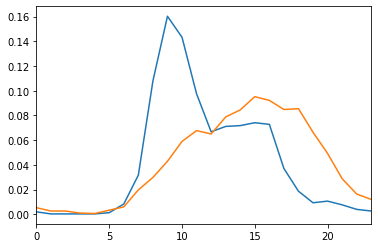

In [36]:
import matplotlib.pyplot as plt
(cream['order_hour_of_day']
 .value_counts(normalize=True)
 .sort_index()
 .plot())

(froyo['order_hour_of_day']
 .value_counts(normalize=True)
 .sort_index()
 .plot())

In [37]:
pd.crosstab(subset['order_hour_of_day'],
            subset['product_name'],
            normalize='columns')

product_name       Half And Half Ultra Pasteurized  Half Baked Frozen Yogurt
order_hour_of_day                                                           
0                                         0.002003                  0.005364
1                                         0.000334                  0.002682
2                                         0.000334                  0.002682
3                                         0.000000                  0.001006
4                                         0.000334                  0.000670
5                                         0.001336                  0.003352
6                                         0.008347                  0.006034
7                                         0.031720                  0.019779
8                                         0.107846                  0.029836
9                                         0.160267                  0.042910
10                                        0.143239                  0.059001
11                                        0.097496                  0.067717
12                                        0.066778                  0.065035
13                                        0.071119                  0.078780
14                                        0.071786                  0.084479
15                                        0.074124                  0.095206
16                                        0.072788                  0.092189
17                                        0.037062                  0.084814
18                                        0.018698                  0.085484
19                                        0.009349                  0.066376
20                                        0.010684                  0.049279
21                                        0.007679                  0.028830
22                                        0.004007                  0.016426
23                                        0.002671                  0.012068

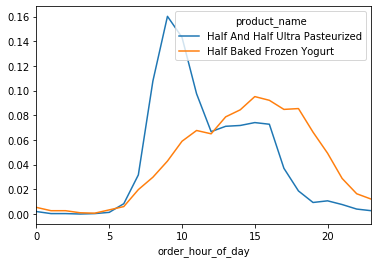

In [38]:
pd.crosstab(subset['order_hour_of_day'],
            subset['product_name'],
            normalize='columns').plot()

In [39]:
subset.head()

product_id              product_name  order_id  order_hour_of_day
25086       30668  Half Baked Frozen Yogurt    595220                 21
29409       30668  Half Baked Frozen Yogurt   3252348                 16
33914       30668  Half Baked Frozen Yogurt    677455                 17
34412       30668  Half Baked Frozen Yogurt   1821824                 14
35652       30668  Half Baked Frozen Yogurt   1225489                 17

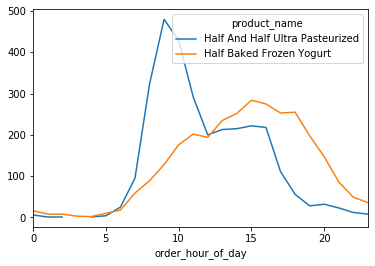

In [40]:
subset.pivot_table(index='order_hour_of_day',
                   columns='product_name',
                   values='order_id',
                   aggfunc=len).plot()

In [41]:
# My crosstab is WIDE format

wide = pd.crosstab(subset['order_hour_of_day'],
                   subset['product_name'],
                   normalize=True)
wide

product_name       Half And Half Ultra Pasteurized  Half Baked Frozen Yogurt
order_hour_of_day                                                           
0                                         0.001004                  0.002676
1                                         0.000167                  0.001338
2                                         0.000167                  0.001338
3                                         0.000000                  0.000502
4                                         0.000167                  0.000335
5                                         0.000669                  0.001673
6                                         0.004182                  0.003011
7                                         0.015892                  0.009870
8                                         0.054031                  0.014888
9                                         0.080294                  0.021412
10                                        0.071763                  0.029441
11                                        0.048846                  0.033791
12                                        0.033456                  0.032452
13                                        0.035631                  0.039311
14                                        0.035965                  0.042155
15                                        0.037136                  0.047508
16                                        0.036467                  0.046002
17                                        0.018568                  0.042322
18                                        0.009368                  0.042656
19                                        0.004684                  0.033121
20                                        0.005353                  0.024590
21                                        0.003847                  0.014386
22                                        0.002007                  0.008197
23                                        0.001338                  0.006022

In [42]:
melted = wide.reset_index().melt(id_vars='order_hour_of_day').rename(columns={
    'order_hour_of_day': 'Hour of Day Ordered',
    'product_name': 'Product',
    'value': 'Percent of Orders by Product'
})
melted

Hour of Day Ordered  ... Percent of Orders by Product
0                     0  ...                     0.001004
1                     1  ...                     0.000167
2                     2  ...                     0.000167
3                     3  ...                     0.000000
4                     4  ...                     0.000167
5                     5  ...                     0.000669
6                     6  ...                     0.004182
7                     7  ...                     0.015892
8                     8  ...                     0.054031
9                     9  ...                     0.080294
10                   10  ...                     0.071763
11                   11  ...                     0.048846
12                   12  ...                     0.033456
13                   13  ...                     0.035631
14                   14  ...                     0.035965
15                   15  ...                     0.037136
16                   16  ...                     0.036467
17                   17  ...                     0.018568
18                   18  ...                     0.009368
19                   19  ...                     0.004684
20                   20  ...                     0.005353
21                   21  ...                     0.003847
22                   22  ...                     0.002007
23                   23  ...                     0.001338
24                    0  ...                     0.002676
25                    1  ...                     0.001338
26                    2  ...                     0.001338
27                    3  ...                     0.000502
28                    4  ...                     0.000335
29                    5  ...                     0.001673
30                    6  ...                     0.003011
31                    7  ...                     0.009870
32                    8  ...                     0.014888
33                    9  ...                     0.021412
34                   10  ...                     0.029441
35                   11  ...                     0.033791
36                   12  ...                     0.032452
37                   13  ...                     0.039311
38                   14  ...                     0.042155
39                   15  ...                     0.047508
40                   16  ...                     0.046002
41                   17  ...                     0.042322
42                   18  ...                     0.042656
43                   19  ...                     0.033121
44                   20  ...                     0.024590
45                   21  ...                     0.014386
46                   22  ...                     0.008197
47                   23  ...                     0.006022

[48 rows x 3 columns]

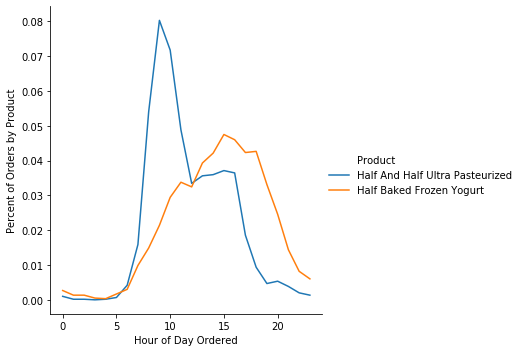

In [43]:
sns.relplot(x='Hour of Day Ordered',
            y='Percent of Orders by Product',
            hue='Product',
            data=melted,
            kind='line');

## Join Data Stretch Challenge

The [Instacart blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2) has a visualization of "**Popular products** purchased earliest in the day (green) and latest in the day (red)." 

The post says,

> "We can also see the time of day that users purchase specific products.

> Healthier snacks and staples tend to be purchased earlier in the day, whereas ice cream (especially Half Baked and The Tonight Dough) are far more popular when customers are ordering in the evening.

> **In fact, of the top 25 latest ordered products, the first 24 are ice cream! The last one, of course, is a frozen pizza.**"

Your challenge is to reproduce the list of the top 25 latest ordered popular products.

We'll define "popular products" as products with more than 2,900 orders.



In [0]:
##### YOUR CODE HERE #####

order_products_stretch = pd.concat([order_products__prior, 
                                    order_products__train])
order_products_stretch = order_products_stretch.drop(['add_to_cart_order', 
                                                      'reordered'], axis=1)


In [82]:
order_products_stretch['product_id'].value_counts()

24852    491291
13176    394930
21137    275577
21903    251705
47209    220877
          ...  
42235         1
5255          1
44495         1
36079         1
20759         1
Name: product_id, Length: 49685, dtype: int64

In [0]:
products_stretch = pd.read_csv('products.csv')
products_stretch = products_stretch.drop(['aisle_id', 'department_id'], axis=1)

In [0]:
orders_stretch = pd.read_csv('orders.csv')
orders_stretch = orders_stretch.drop(['user_id', 'eval_set', 'order_dow', 'days_since_prior_order'], axis=1)

In [0]:
# Merging to create one data file

merged_stretch = pd.merge(order_products_stretch, products_stretch)

In [0]:
merged_all_3_stretch = (pd.merge(merged_stretch, orders_stretch)
                        .drop(['order_number'], axis=1))

In [0]:
# A data frame with just the product name, and the hour of day it was purchased
merged_all_3_stretch = merged_all_3_stretch.drop(['order_id', 'product_id'], 
                                                 axis=1)

In [94]:
print(merged_all_3_stretch.shape)
merged_all_3_stretch.head()

(33819106, 2)


product_name  order_hour_of_day
0     Organic Egg Whites                  9
1  Michigan Organic Kale                  9
2          Garlic Powder                  9
3         Coconut Butter                  9
4      Natural Sweetener                  9

In [0]:
merged_final = merged_all_3_stretch[merged_all_3_stretch['order_hour_of_day'] >= 12]

In [85]:
# This is a list of the top 25 items ordered after 12.
merged_final['product_name'].value_counts()[:25]

Banana                      313384
Bag of Organic Bananas      252095
Organic Strawberries        178282
Organic Baby Spinach        164262
Organic Hass Avocado        144474
Organic Avocado             121529
Large Lemon                 104517
Limes                        96661
Strawberries                 94653
Organic Whole Milk           90764
Organic Raspberries          90421
Organic Yellow Onion         76988
Organic Garlic               75497
Organic Zucchini             71902
Organic Blueberries          67542
Cucumber Kirby               66140
Organic Lemon                59593
Organic Grape Tomatoes       58152
Organic Fuji Apple           57298
Organic Cucumber             55883
Apple Honeycrisp Organic     55092
Seedless Red Grapes          54903
Honeycrisp Apple             52770
Organic Baby Carrots         51167
Yellow Onions                50864
Name: product_name, dtype: int64

## Reshape Data Stretch Challenge

_Try whatever sounds most interesting to you!_

- Replicate more of Instacart's visualization showing "Hour of Day Ordered" vs "Percent of Orders by Product"
- Replicate parts of the other visualization from [Instacart's blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2), showing "Number of Purchases" vs "Percent Reorder Purchases"
- Get the most recent order for each user in Instacart's dataset. This is a useful baseline when [predicting a user's next order](https://www.kaggle.com/c/instacart-market-basket-analysis)
- Replicate parts of the blog post linked at the top of this notebook: [Modern Pandas, Part 5: Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)